### Apply the 'gettig started' Turorial to our dataset (aggregation by week)

In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('../../data/cleaned/weekseries_04_18.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(783,            ds    y
 0  2004-01-04  142
 1  2004-01-11  263
 2  2004-01-18  291
 3  2004-01-25  222
 4  2004-02-01  277,              ds    y
 778  2018-12-02  261
 779  2018-12-09  274
 780  2018-12-16  275
 781  2018-12-23  234
 782  2018-12-30  150)

In [4]:
df.iloc[1]

ds    2004-01-11
y            263
Name: 1, dtype: object

In [5]:
m = Prophet() #daily_seasonality=True) #, weekly_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1143,2019-12-26
1144,2019-12-27
1145,2019-12-28
1146,2019-12-29
1147,2019-12-30


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1143,2019-12-26,202.078267,169.621524,235.863061
1144,2019-12-27,199.157264,163.972902,233.867194
1145,2019-12-28,196.401618,163.564077,229.886870
1146,2019-12-29,193.861877,157.606788,226.602271
1147,2019-12-30,191.583324,159.570703,225.072624


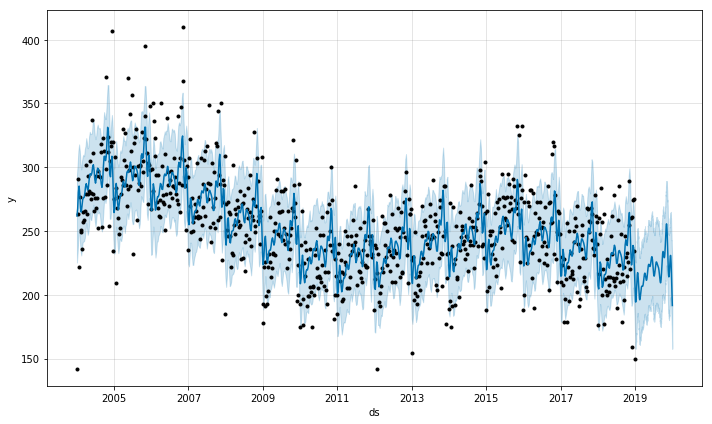

In [8]:
fig1 = m.plot(forecast)

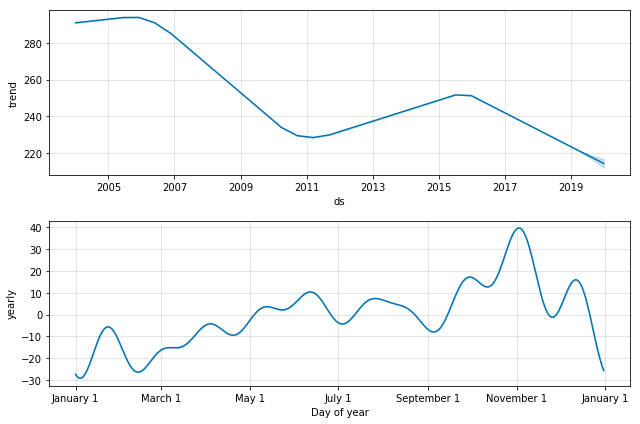

In [9]:
fig2 = m.plot_components(forecast)

### Conclusion: the weekly forecast looks pretty good 
We need to check with the 2019 data.

### Let's go further throught the tutorial to find useful features

#### Changepoints

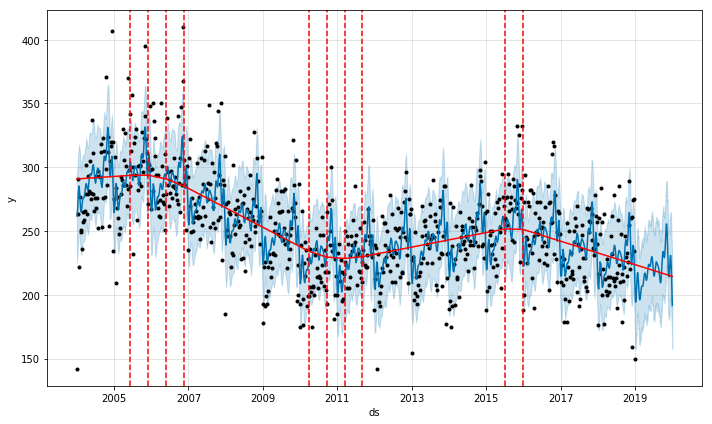

In [10]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [12]:
# m = Prophet(changepoint_prior_scale=0.5)
# forecast = m.fit(df).predict(future)
# fig = m.plot(forecast)

#### Seasonalities

Seasonalities are estimated using a partial Fourier sum.
See the paper for complete details, and this figure on Wikipedia for an illustration of how a partial Fourier sum can approximate an aribtrary periodic signal. 

The default Fourier order for yearly seasonality is 10.
The default values are often appropriate, but they can be increased when the seasonality needs to fit higher-frequency changes, and generally be less smooth.
(Increasing the number of Fourier terms allows the seasonality to fit faster changing cycles, but can also lead to overfitting.)
The Fourier order can be specified for each built-in seasonality when instantiating the model, here it is increased to 20:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


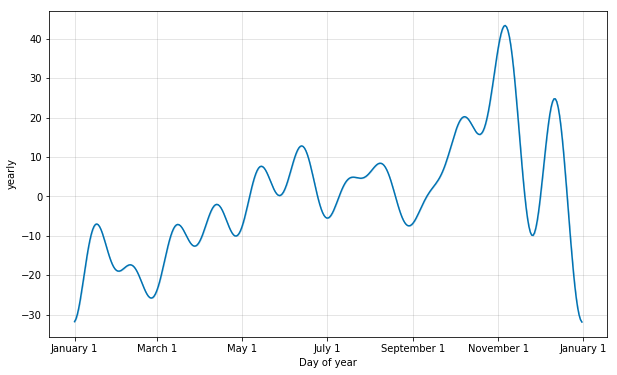

In [15]:
from fbprophet.plot import plot_yearly
m = Prophet(yearly_seasonality=12).fit(df)
a = plot_yearly(m)

#### Holidays

In [21]:
m2 = Prophet() #daily_seasonality=True) #, weekly_seasonality=True)
m2.add_country_holidays(country_name='US')
m2.fit(df)
m2.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [42]:
future = m2.make_future_dataframe(periods=53,freq='W',include_history=False)
future.head(2)

,ds
0,2019-01-06
1,2019-01-13


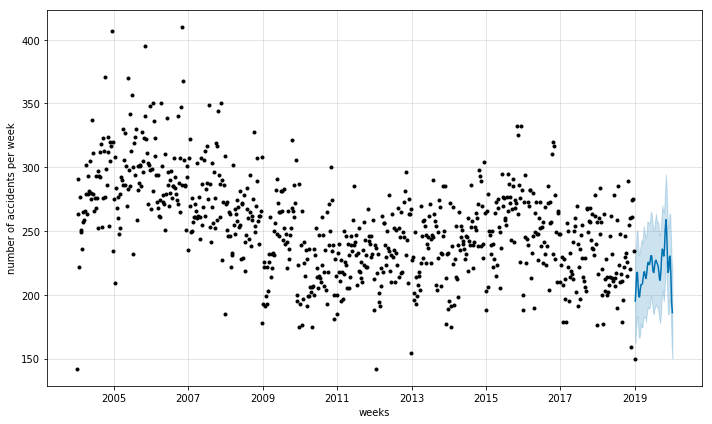

In [43]:
forecast = m2.predict(future)
fig1 = m2.plot(forecast, xlabel='weeks', ylabel='number of accidents per week')

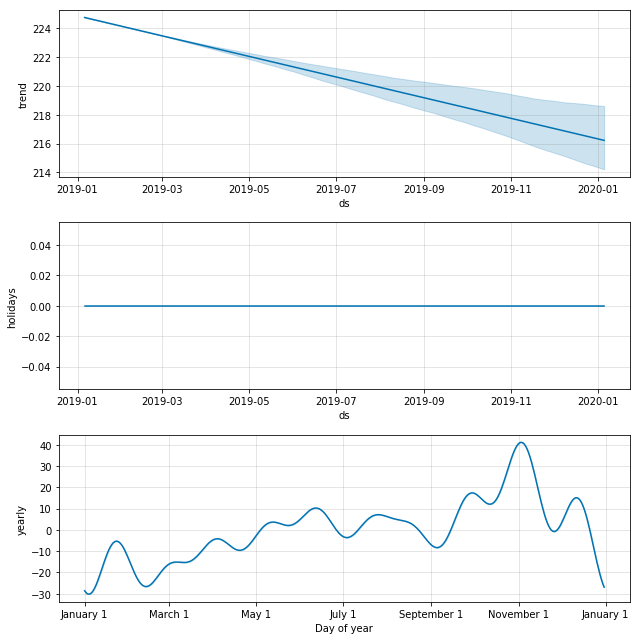

In [44]:
fig2 = m2.plot_components(forecast)

In [45]:
# forecast.info()

In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,224.752573,162.165530,228.773383,224.752573,224.752573,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-29.756176,-29.756176,-29.756176,0.0,0.0,0.0,194.996397
1,2019-01-13,224.588608,172.768290,238.941962,224.588608,224.588608,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-19.401294,-19.401294,-19.401294,0.0,0.0,0.0,205.187313
2,2019-01-20,224.424642,181.717280,248.971329,224.424642,224.424642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-7.371304,-7.371304,-7.371304,0.0,0.0,0.0,217.053338
3,2019-01-27,224.260676,183.475828,250.699859,224.260676,224.260676,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-6.682722,-6.682722,-6.682722,0.0,0.0,0.0,217.577954
4,2019-02-03,224.096710,174.777383,240.762714,224.096710,224.096710,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-16.469160,-16.469160,-16.469160,0.0,0.0,0.0,207.627550


In [35]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
831,2019-12-08,215.782616,201.386533,267.386278,213.826429,217.754082,19.638232,19.638232,19.638232,19.638232,19.638232,19.638232,0.0,0.0,0.0,235.420848
832,2019-12-15,215.611338,201.840311,271.582100,213.573015,217.625447,21.654980,21.654980,21.654980,21.654980,21.654980,21.654980,0.0,0.0,0.0,237.266318
833,2019-12-22,215.440060,175.859439,243.354261,213.329961,217.526299,-4.584824,-4.584824,-4.584824,-4.584824,-4.584824,-4.584824,0.0,0.0,0.0,210.855235
834,2019-12-29,215.268781,152.287926,218.678679,213.088456,217.427769,-29.224752,-29.224752,-29.224752,-29.224752,-29.224752,-29.224752,0.0,0.0,0.0,186.044029
835,2020-01-05,215.097503,153.644165,220.106454,212.852269,217.299750,-27.873950,-27.873950,-27.873950,-27.873950,-27.873950,-27.873950,0.0,0.0,0.0,187.223552


In [48]:
m2.train_holiday_names

0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object